# Cthulhu News Draft Three

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("..")

In [3]:
from IPython.display import Image

import os
import json
from datetime import datetime, timedelta, timezone
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dotenv import load_dotenv
from envparse import env
from loguru import logger
from logutil import init_loguru

2025-06-23T11:13:34.017Z __main__ DEBUG: this is a test log line


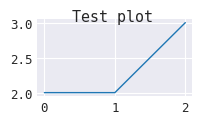

In [4]:
np.random.seed(42**3)

init_loguru()
logger.debug("this is a test log line")

# plt.style.use('ggplot')
# plt.style.use('dark_background')
plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["font.family"] = "monospace"
plt.rcParams["font.size"] = 9

plt.figure(figsize=(2, 1))
plt.plot([0, 1, 2], [2, 2, 3])
plt.suptitle("Test plot")

np.set_printoptions(edgeitems=30, linewidth=10000)
pd.options.display.max_rows = 200
pd.options.display.max_columns = 80
pd.options.display.max_colwidth = 100

In [5]:
load_dotenv()

print(env.str("POSTGRES_HOST"))
print(env.str("OPENAI_API_KEY")[-3:])

localhost
gsV


In [6]:
from web import db_utils
from web import etl
from web import llm_cthulhu_new as llm
from web import llm_cthulhu_prompts as prompts

2025-06-23T11:13:45.276Z web.etl DEBUG: CTHULHU_IMAGE_DIR=/Users/nameless/dev/proj/cthulhu-news/drafts/data/images
2025-06-23T11:13:45.279Z web.db_utils INFO: initialized the local news db


In [7]:
def default_json_converter(o):
    if isinstance(o, datetime):
        return o.isoformat()
    raise TypeError(f'Object of type {o.__class__.__name__} is not JSON serializable')

## Minor Tests

In [19]:
import litellm

response = litellm.completion(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "What is the capital of France?"},
    ],
    temperature=0.7,
    max_tokens=50,
    stream=False,
    frequency_penalty=0.0
)
print(response.choices[0].message.content.strip())

The capital of France is Paris.


## Mongo db

### Load News Articles

In [8]:
to_ = datetime.now()
from_ = to_ - timedelta(days=5)
news_articles = etl.load_mongo_news_articles(from_=from_, to_=to_, limit=10)
print(len(news_articles))

2025-06-23T11:13:47.577Z web.etl DEBUG: loading mongo news articles from=2025-06-18T13:13:47Z to=2025-06-23T13:13:47Z limit=10 
2025-06-23T11:13:47.584Z web.etl DEBUG: mongo filter_params={'gpt_summary': {'$exists': True}, 'published_at': {'$gt': datetime.datetime(2025, 6, 18, 13, 13, 47, 577123), '$lt': datetime.datetime(2025, 6, 23, 13, 13, 47, 577123)}}
2025-06-23T11:13:48.299Z web.etl DEBUG: loaded a news article title=Nationwide, Lloyds, NatWest and Santander customers wake up to £180 payments published_at=2025-06-23 08:09:13
2025-06-23T11:13:48.300Z web.etl DEBUG: loaded a news article title=Monty Don shares two tomato plant jobs to do in June for 'strong' growth published_at=2025-06-23 06:47:15
2025-06-23T11:13:48.300Z web.etl DEBUG: loaded a news article title=Money blog: 'Priests don't get a salary - and I'm asked one question most frequently' published_at=2025-06-23 06:47:00
2025-06-23T11:13:48.301Z web.etl DEBUG: loaded a news article title=Money blog: 'Priests don't get a s

10


## Postgres db

### Download existing Cthulhu articles

In [9]:
# db.init_local_news_db()

In [10]:
cthulhu_articles = db_utils.load_formatted_cthulhu_articles(article_id=None)
print(len(cthulhu_articles))

2025-06-23T11:13:57.546Z web.db_utils DEBUG: getting all Cthulhu articles from the local db article_id=None...
2025-06-23T11:13:57.554Z web.db_utils INFO: fetched and processed all Cthulhu articles from the local db article_id=None n=2 elapsed=0.01s


2


In [11]:
news_articles[-1:]

[{'_id': ObjectId('68587903a895c2ec03de69b9'),
  'title': 'Scammers are impersonating finance experts to steal millions - and the real ones are struggling to stop it',
  'description': 'Fraudsters are increasingly posing as actual financial heavyweights and using AI deepfakes to target investors on social-media platforms such as WhatsApp and Facebook',
  'partial_text': 'Open this photo in gallery: Scams impersonating celebrities and politicians have proliferated for years, but fraud targeting investors through fake advice from big names in finance is multiplying online.Facebook\nLast week, Bank of Montreal chief inve... [6244 chars]',
  'url': 'https://www.theglobeandmail.com/investing/personal-finance/article-imposter-scams-fraud-social-media-meta-whatsapp-ai/',
  'published_at': datetime.datetime(2025, 6, 22, 19, 53, 12),
  'media_source_name': 'The Globe and Mail',
  'media_source_url': 'www.theglobeandmail.com',
  'listing_query': 'finance',
  'listing_source': 'gnews',
  'full_te

### Generate new Cthulhu articles

In [ ]:
new_cthulhu_articles = etl.generate_cthulhu_news(
    cthulhu_articles, news_articles[-1:], [datetime.now(tz=timezone.utc)]
)
new_cthulhu_articles

2025-06-23T11:14:08.945Z web.llm_cthulhu_new DEBUG: added gpt generated fields title='The Veil of False Faces' & scene_text='But this is only par...'
/Users/nameless/dev/proj/cthulhu-news/.venv/lib/python3.12/site-packages/pydantic/main.py:463: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected 9 fields but got 6: Expected `Message` - serialized value may not be as expected [input_value=Message(content='{\n  "sc...: None}, annotations=[]), input_type=Message])
  PydanticSerializationUnexpectedValue(Expected `StreamingChoices` - serialized value may not be as expected [input_value=Choices(finish_reason='st...ider_specific_fields={}), input_type=Choices])
  return self.__pydantic_serializer__.to_python(
2025-06-23T11:14:16.057Z web.llm_cthulhu_new DEBUG: added gpt generated fields story_summary='Between late 2024 an...'
/Users/nameless/dev/proj/cthulhu-news/.venv/lib/python3.12/site-packages/pydantic/main.py:463: UserWarning: Pydantic serializer wa

[{'scene_timestamp': datetime.datetime(2025, 6, 23, 11, 14, 3, 314394, tzinfo=datetime.timezone.utc),
  'scene_number': 3,
  'news_title': 'Scammers are impersonating finance experts to steal millions - and the real ones are struggling to stop it',
  'news_summary': "Investment scams impersonating well-known finance experts such as Bank of Montreal's Brian Belski and economist David Rosenberg are proliferating on social media platforms like Facebook and Instagram, using AI-generated deepfake videos and fake accounts to lure investors into fraudulent WhatsApp groups. These scams have caused significant financial losses, with Canadian social-media-based investment scam losses rising sharply in recent years. Law enforcement and legal experts highlight challenges in holding social-media companies accountable due to jurisdictional and legal limitations, though some progress is seen with initiatives like Meta's facial recognition program to detect scams. Comparisons with countries like Austr

/Users/nameless/dev/proj/cthulhu-news/.venv/lib/python3.12/site-packages/pydantic/main.py:463: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected 9 fields but got 6: Expected `Message` - serialized value may not be as expected [input_value=Message(content='The capi...: None}, annotations=[]), input_type=Message])
  PydanticSerializationUnexpectedValue(Expected `StreamingChoices` - serialized value may not be as expected [input_value=Choices(finish_reason='st...ider_specific_fields={}), input_type=Choices])
  return self.__pydantic_serializer__.to_python(


In [13]:
print(prompts.format_scenes(new_cthulhu_articles))

Scene #3. 2025-06-23.

Today's news article: 'Scammers are impersonating finance experts to steal millions - and the real ones are struggling to stop it'. Investment scams impersonating well-known finance experts such as Bank of Montreal's Brian Belski and economist David Rosenberg are proliferating on social media platforms like Facebook and Instagram, using AI-generated deepfake videos and fake accounts to lure investors into fraudulent WhatsApp groups. These scams have caused significant financial losses, with Canadian social-media-based investment scam losses rising sharply in recent years. Law enforcement and legal experts highlight challenges in holding social-media companies accountable due to jurisdictional and legal limitations, though some progress is seen with initiatives like Meta's facial recognition program to detect scams. Comparisons with countries like Australia suggest Canada lags in coordinated fraud prevention efforts.
(source: The Globe and Mail)

Truth: 'The Veil 

In [14]:
etl.add_cthulhu_images(new_cthulhu_articles)

2025-06-23T11:14:54.234Z web.llm_cthulhu_new DEBUG: revised_prompt="Create a dark, surreal scene rooted in retro aesthetics. It portrays an alarming narrative of investment scams proliferating on social network interfaces, manifesting as uncannily realistic synthetic avatars of financial experts such as an economist and bank professional participating in fraudulent online groups. These digital apparitions lure unsuspecting individuals, causing substantial financial harm. However, there's a hidden sanctuary within the city, set up by a detective organization known as the Ravens. Envision safe houses tempered with mystic energy dotted around the city, part hideout, part training facility, creating minds sturdy against the encroaching chaos orchestrated by a cult. Some recruits exhibit robust resilience; others teeter on the brink of mental turmoil due to the cult's manipulation. The Enchantress, a key force within the Ravens, works tirelessly to unravel the cryptic digital maze of the sc

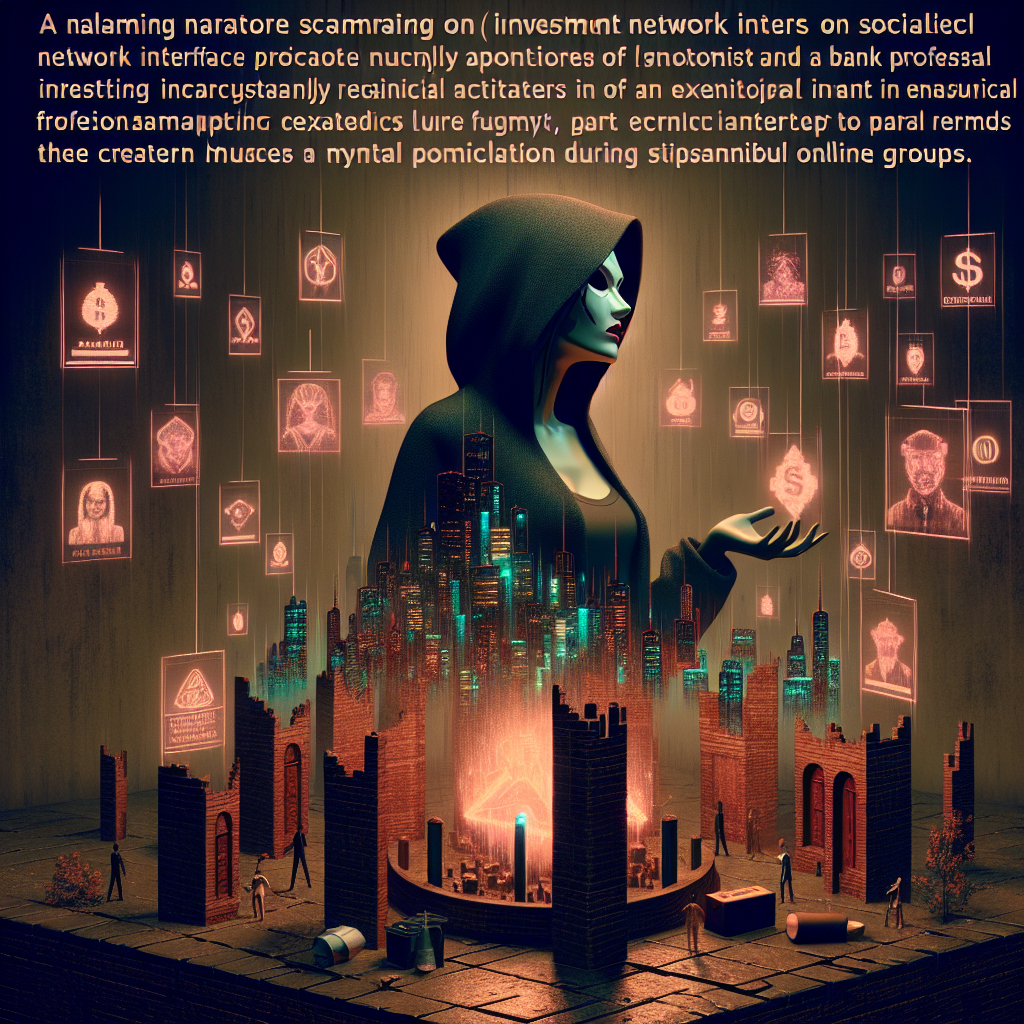

In [15]:
fdir = Path(new_cthulhu_articles[-1]["image_meta"]["cthulhu_image_dir"])
fname = fdir / new_cthulhu_articles[-1]["image_meta"]["cthulhu_image_filename"]

Image(filename=fname, width=300)

In [16]:
db_utils.insert_cthulhu_articles(new_cthulhu_articles)

2025-06-23T11:14:54.337Z web.db_utils INFO: inserted Cthulhu articles into the local db n=1


1

In [17]:
cthulhu_articles_2 = db_utils.load_formatted_cthulhu_articles(article_id=None)
cthulhu_articles_2

2025-06-23T11:14:54.364Z web.db_utils DEBUG: getting all Cthulhu articles from the local db article_id=None...
2025-06-23T11:14:54.368Z web.db_utils INFO: fetched and processed all Cthulhu articles from the local db article_id=None n=3 elapsed=0.00s


[{'scene_number': 3,
  'scene_timestamp': datetime.datetime(2025, 6, 23, 11, 14, 3, 314394, tzinfo=datetime.timezone.utc),
  'news_title': 'Scammers are impersonating finance experts to steal millions - and the real ones are struggling to stop it',
  'news_summary': "Investment scams impersonating well-known finance experts such as Bank of Montreal's Brian Belski and economist David Rosenberg are proliferating on social media platforms like Facebook and Instagram, using AI-generated deepfake videos and fake accounts to lure investors into fraudulent WhatsApp groups. These scams have caused significant financial losses, with Canadian social-media-based investment scam losses rising sharply in recent years. Law enforcement and legal experts highlight challenges in holding social-media companies accountable due to jurisdictional and legal limitations, though some progress is seen with initiatives like Meta's facial recognition program to detect scams. Comparisons with countries like Austr